# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


# Exercise 4.1 



### What is the relation between the age and Income?

In [5]:
np.corrcoef(np.log(income['Age']), np.log(income['Income']))

array([[1.        , 0.36546776],
       [0.36546776, 1.        ]])

Cómo se puede ver en la celda anterior, el coeficiente de correlación entre 'Age' e 'Income' es muy débil, por lo que no se puede afirmar que exista una relación entre las dos variables.

### Desarrollo del modelo

In [22]:
df_x = pd.DataFrame(income['Age'])
df_y = pd.DataFrame(income['Income'])

In [32]:
# import
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

xTest, xTrain, yTest, yTrain = train_test_split(df_x, df_y, test_size = 0.7, random_state = 1)
regr = linear_model.LinearRegression()
regr.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

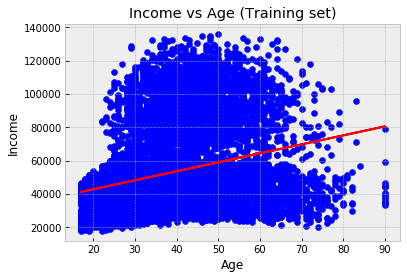

In [24]:
import matplotlib.pyplot as plot

plot.style.use('bmh')
plot.scatter(xTrain, yTrain, color = 'blue')
plot.plot(xTrain, regr.predict(xTrain), color = 'red')
plot.title('Income vs Age (Training set)')
plot.xlabel('Age')
plot.ylabel('Income')
plot.show()

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

In [25]:
PY = [[30],[40]]
y_pred = regr.predict(PY)
print('El salario estimado para una edad de 30 años es:', y_pred[0])
print('El salario estimado para una edad de 30 años es:', y_pred[1])

El salario estimado para una edad de 30 años es: [48284.11878732]
El salario estimado para una edad de 30 años es: [53666.08656657]



For a one percent increase in the Age how much the income increases?


# Exercise 4.2
Evaluate the model using the MSE

In [39]:
y_pred = regr.predict(xTrain)

In [40]:
from sklearn import metrics
import numpy as np
print('MSE:', metrics.mean_squared_error(yTrain, y_pred))

MSE: 589653964.8423535



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [59]:
income['Age']**2

0        1521
1        2500
2        1444
3        2809
4         784
5        1369
6        2401
7        2704
8         961
9        1764
10       1369
11        900
12        529
13       1024
14       1600
15       1156
16        625
17       1024
18       1444
19       1849
20       1600
21       2916
22       1225
23       1849
24       3481
25       3136
26        361
27       2916
28       1521
29       2401
         ... 
32531     900
32532    1156
32533    2916
32534    1369
32535     484
32536    1156
32537     900
32538    1444
32539    5041
32540    2025
32541    1681
32542    5184
32543    2025
32544     961
32545    1521
32546    1369
32547    1849
32548    4225
32549    1849
32550    1849
32551    1024
32552    1849
32553    1024
32554    2809
32555     484
32556     729
32557    1600
32558    3364
32559     484
32560    2704
Name: Age, Length: 32561, dtype: int64

In [60]:
import pandas as pd
data = pd.DataFrame(income['Income'], income['Age'])
data

,Income
Age,
39,49560.0
50,37157.0
38,95413.0
53,119038.0
28,49816.0
37,21296.0
49,38889.0
52,115947.0
31,34683.0


In [65]:
data= pd.DataFrame(income['Income'], income['Age'])

In [66]:
data

,Income
Age,
39,49560.0
50,37157.0
38,95413.0
53,119038.0
28,49816.0
37,21296.0
49,38889.0
52,115947.0
31,34683.0


In [ ]:
# import
from sklearn.linear_model import LinearRegression
# Initialize
linreg = LinearRegression(fit_intercept=False)
# Fit
linreg.fit(X_, y)

In [ ]:
import matplotlib.pyplot as plot

plot.scatter(X_, y, color = 'blue')
plot.plot(X_, linreg.predict(X_), color = 'red')
plot.title('Income vs Age (Training set)')
plot.xlabel('Age')
plot.ylabel('Income')
plot.show()

In [ ]:
# import
from sklearn.linear_model import LinearRegression
# Initialize
linreg2 = LinearRegression(fit_intercept=False)
# Fit
linreg2.fit(X_2, y)

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [ ]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [ ]:
data.head()

# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [ ]:
df_y = pd.DataFrame(data['Churn?'])

In [ ]:
df_y

In [ ]:
from sklearn.model_selection import train_test_split

xTest, xTrain, yTest, yTrain = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1)

In [ ]:
df_x = pd.DataFrame()
xTest, xTrain, yTest, yTrain = train_test_split(df_x, df_y, test_size = 1/3, random_state = 1)

In [ ]:
df.head()

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set
